In [ ]:
import numpy as np 
import pandas as pd

train = pd.read_csv("/kaggle/input/playground-series-s5e11/train.csv")
test  = pd.read_csv("/kaggle/input/playground-series-s5e11/test.csv")

In [3]:
# Configuration
class Config:
    """Configuration class for hyperparameters and settings"""
    TARGET = 'loan_paid_back'

config = Config()

In [21]:
# Separate numerical and categorical columns
numerical_cols = train.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('id')

if config.TARGET in numerical_cols:
    numerical_cols.remove(config.TARGET)

categorical_cols = train.select_dtypes(include=['object']).columns.tolist()

# Combine all feature names
all_features = numerical_cols + categorical_cols
total_features   = len(all_features)
print(f"\nTotal features: {total_features}")


Total features: 11


# Feature Encoding

In [22]:
from sklearn.preprocessing import StandardScaler

# Store target encoding mappings globally
target_encoding_maps = {}

def transform(df, train=True):
    global target_encoding_maps
    
    ### Label Encoding On Ordinal Data
    
    # Binning - Extract first letter part from grade_subgrade to represent subgrade 
    df['grade_subgrade'] = df['grade_subgrade'].str[0]
    education_level_mapping = {"High School":0, "Bachelor's":1, "Master's":2, "PhD":3, "Other":4}
    df['education_level'] = df['education_level'].map(education_level_mapping)
    
    ### Target Encoding
    
    # if train:
    #     for col in categorical_cols:
    #         # Calculate mean target value for each category
    #         target_means = df.groupby(col)[config.TARGET].mean()
    #         # Store the mapping for later use
    #         target_encoding_maps[col] = target_means
    #         # Replace original values with target encoding
    #         df[f"{col}_en"] = df[col].map(target_means)
    # else:
    #     for col in categorical_cols:
    #         # Use the stored mappings from training data
    #         df[f"{col}_en"] = df[col].map(target_encoding_maps[col])
    #         # Handle unseen categories by filling with the overall mean from training
    #         df[f"{col}_en"] = df[f"{col}_en"].fillna(target_encoding_maps[col].mean())
            
    ## Performing One Hot Encoding On Categorical Features
    df = pd.get_dummies(df, columns=categorical_cols)

    ## To achieve Normal Distribution for skewed features
    df['annual_income']        = np.log(df['annual_income']+1)
    df['debt_to_income_ratio'] = df['debt_to_income_ratio']**(1/5)

    ## Feature Scaling ##
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    
    return df

In [47]:
train_en = transform(train.copy())
train_en

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back,gender_Female,gender_Male,gender_Other,...,loan_purpose_Home,loan_purpose_Medical,loan_purpose_Other,loan_purpose_Vacation,grade_subgrade_A,grade_subgrade_B,grade_subgrade_C,grade_subgrade_D,grade_subgrade_E,grade_subgrade_F
0,0,-0.620693,-0.448809,0.993849,-1.803484,0.653899,1.0,True,False,False,...,False,False,True,False,False,False,True,False,False,False
1,1,-1.127074,0.843097,-0.810394,-1.505401,0.280571,0.0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,2,0.312680,-0.190367,0.236067,0.286558,-1.292385,1.0,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,3,0.212492,-0.891332,-2.668764,-1.492497,1.863482,1.0,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,4,-0.872767,-1.227675,-0.287163,-0.409421,-1.068388,1.0,False,True,False,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593989,593989,-1.056209,0.665918,0.398449,0.857295,-0.714971,1.0,True,False,False,...,False,False,False,False,False,False,True,False,False,False
593990,593990,-0.293145,-0.044822,-2.199661,-1.698263,1.126781,1.0,False,True,False,...,False,False,False,False,False,False,False,False,False,True
593991,593991,0.222147,-0.717544,-0.106739,-2.034358,0.882873,1.0,True,False,False,...,False,False,False,False,False,False,True,False,False,False
593992,593992,1.092379,-0.840208,1.066019,0.183368,-1.237630,1.0,False,True,False,...,False,False,False,False,False,True,False,False,False,False


In [48]:
test_en = transform(test.copy(), train=False)
test_en

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender_Female,gender_Male,gender_Other,marital_status_Divorced,...,loan_purpose_Home,loan_purpose_Medical,loan_purpose_Other,loan_purpose_Vacation,grade_subgrade_A,grade_subgrade_B,grade_subgrade_C,grade_subgrade_D,grade_subgrade_E,grade_subgrade_F
0,593994,-0.656293,-1.351785,-0.989459,-0.513617,1.178469,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
1,593995,0.202990,-0.265009,0.916193,0.068692,0.246668,True,False,False,False,...,False,False,True,False,False,False,True,False,False,False
2,593996,0.495706,2.589558,-1.259127,-1.620933,0.464749,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,593997,-0.861798,0.043506,-0.180456,-1.219629,-1.379028,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,593998,-0.895096,-0.511232,0.125167,0.387183,0.221886,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254564,848558,1.429579,-0.813423,1.131927,2.121775,0.558920,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
254565,848559,0.285838,-0.304208,-0.845636,0.760974,-1.374071,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
254566,848560,-1.246012,-0.207456,0.664503,1.642668,-1.661542,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
254567,848561,-0.353992,-0.245662,1.042038,-0.564766,-1.260074,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False


In [49]:
columns_to_test_model = train_en.select_dtypes(include=[np.number, 'float64', 'int64', 'bool']).columns.tolist()
columns_to_test_model.remove(config.TARGET)
columns_to_test_model.remove('id')

print(f"Total Features After Transformation: {len(columns_to_test_model)}")

Total Features After Transformation: 36


# Feature Selection

## Lasso and RFE

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.preprocessing import StandardScaler

# Separate features and target in train_en
X = train_en[columns_to_test_model]
y = train_en[config.TARGET]

# L1 Logistic Regression for feature selection
lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=5)
lasso.fit(X, y)

# Select features where coef_ != 0
model = SelectFromModel(lasso, prefit=True)
X_lasso_selected = model.transform(X)
selected_features_lasso = X.columns[model.get_support()]

print("Features selected by Lasso:")
print(selected_features_lasso)

# # Recursive Feature Elimination with Logistic Regression
# log_reg = LogisticRegression(max_iter=1000, solver='lbfgs')
# rfe = RFE(estimator=log_reg, n_features_to_select=5)  # Adjust number of features as needed
# rfe.fit(X, y)
# selected_features_rfe = X.columns[rfe.support_]

# print("Features selected by RFE:")
# print(selected_features_rfe)

Features selected by Lasso:
Index(['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount',
       'interest_rate', 'gender_Female', 'gender_Male', 'gender_Other',
       'marital_status_Divorced', 'marital_status_Married',
       'marital_status_Single', 'marital_status_Widowed', 'education_level_0',
       'education_level_1', 'education_level_2', 'education_level_3',
       'education_level_4', 'employment_status_Employed',
       'employment_status_Retired', 'employment_status_Self-employed',
       'employment_status_Student', 'employment_status_Unemployed',
       'loan_purpose_Business', 'loan_purpose_Car',
       'loan_purpose_Debt consolidation', 'loan_purpose_Education',
       'loan_purpose_Home', 'loan_purpose_Medical', 'loan_purpose_Other',
       'loan_purpose_Vacation', 'grade_subgrade_A', 'grade_subgrade_B',
       'grade_subgrade_C', 'grade_subgrade_D', 'grade_subgrade_E',
       'grade_subgrade_F'],
      dtype='object')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


# Testing Prediction On Training Data

In [51]:
import pandas as pd

# Assuming your dataset is in a DataFrame df with target column 'loan_paid_back'
majority_class = train_en[train_en['loan_paid_back'] == 1]
minority_class = train_en[train_en['loan_paid_back'] == 0]

# Randomly sample 20% from the majority class
majority_sample = majority_class.sample(frac=0.20, random_state=42)

# Combine the sampled majority with all of minority class
balanced_df = pd.concat([majority_sample, minority_class])

In [53]:
balanced_df['loan_paid_back'].value_counts()

loan_paid_back
0.0    119500
1.0     94899
Name: count, dtype: int64

In [54]:
train_en = balanced_df

In [ ]:
from sklearn.model_selection import train_test_split

X = train_en[selected_features_lasso]
# X = train_en[selected_features_rfe]
y = train_en[config.TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, solver='lbfgs')

model.fit(X_train, y_train)

# Predict on scaled test data
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import roc_auc_score

# Predict probabilities for positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC score with Logistic Regression:", roc_auc)

ROC AUC score with Logistic Regression: 0.909268951596226


## Logistic Regression Model on Test Data

In [15]:
y_pred = model.predict(test_en[columns_to_test_model])

In [16]:
test_en.loc[:, 'id'] = test['id']

In [17]:
output = pd.DataFrame({'id': test_en['id'], 'loan_paid_back': y_pred})
output.to_csv('sample_submission.csv', index=False)

In [18]:
output['loan_paid_back'].value_counts()

loan_paid_back
1.0    189446
0.0     65123
Name: count, dtype: int64

# Catboost Model

0:	test: 0.8994339	best: 0.8994339 (0)	total: 53.1ms	remaining: 53.1s
100:	test: 0.9160253	best: 0.9160253 (100)	total: 1.4s	remaining: 12.5s
200:	test: 0.9181913	best: 0.9181913 (200)	total: 2.45s	remaining: 9.73s
300:	test: 0.9194136	best: 0.9194136 (300)	total: 3.45s	remaining: 8s
400:	test: 0.9204299	best: 0.9204318 (395)	total: 4.43s	remaining: 6.62s
500:	test: 0.9211260	best: 0.9211260 (500)	total: 5.41s	remaining: 5.39s
600:	test: 0.9215097	best: 0.9215098 (598)	total: 6.47s	remaining: 4.3s
700:	test: 0.9216319	best: 0.9216379 (697)	total: 7.5s	remaining: 3.2s
800:	test: 0.9217297	best: 0.9217308 (798)	total: 8.54s	remaining: 2.12s
900:	test: 0.9218522	best: 0.9218640 (873)	total: 9.58s	remaining: 1.05s
999:	test: 0.9219860	best: 0.9219967 (995)	total: 10.6s	remaining: 0us

bestTest = 0.9219967432
bestIteration = 995

Shrink model to first 996 iterations.
ROC AUC Score: 0.9220


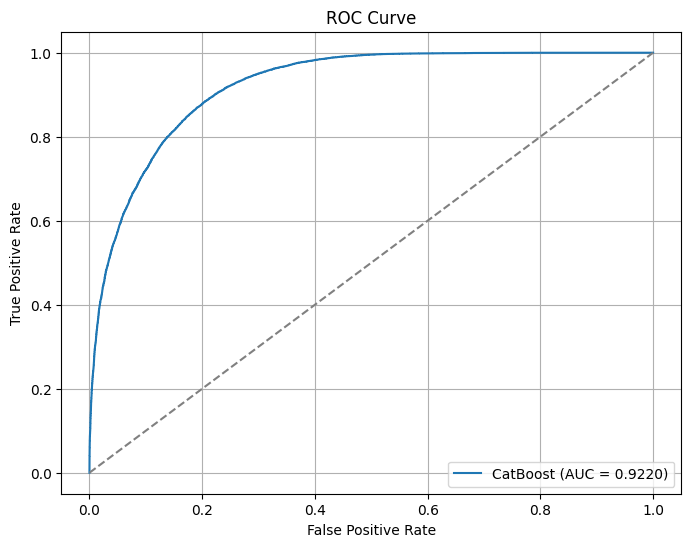

In [56]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize model with AUC as eval metric
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    eval_metric='AUC',
    random_seed=42,
    verbose=100
)

# Fit with eval set for early stopping and metric evaluation
model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

# Predict probabilities (needed for ROC curve)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {auc_score:.4f}")

# Compute ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'CatBoost (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [57]:
y_pred = model.predict(test_en[columns_to_test_model])

In [58]:
test_en.loc[:, 'id'] = test['id']

In [ ]:
output = pd.DataFrame({'id': test_en['id'], 'loan_paid_back': y_pred})
output.to_csv('sample_submission.csv', index=False)

In [60]:
output['loan_paid_back'].value_counts()

loan_paid_back
1.0    182581
0.0     71988
Name: count, dtype: int64